# W51CA3 2DGaussian Fitting

/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0

/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0

/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits

/orange/adamginsburg/w51/vla/19A-254/continuum_imaging_K

::https://github.com/keflavich/hiimodel::

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import visualization
from astropy import units as u
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from quicklook_multicolorbar import quicklook
from astropy.visualization import quantity_support


import pylab as pl

In [ ]:
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'

In [ ]:
cube = SpectralCube.read(directory1, format='fits')
print(cube[0,:,:])

In [ ]:
fn = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0'
img = SpectralCube.read(fn, format='casa_image')
cen = img.shape[1]/2, img.shape[2]/2
fig = pl.figure(figsize=(20,20))

fig, ax = quicklook(img[:,cen[0]-150:cen[0]+250, cen[1]-400:cen[1]+400], fig=fig, inner_stretch='linear')

#fig, ax = quicklook(img[:,cen[0]+80:cen[0]+105, cen[1]-215:cen[1]-190], fig=fig, inner_stretch='linear')



## fig = pl.figure(figsize=(20,20))
fig, ax = quicklook(img[:,cen[0]-0:cen[0]+50, cen[1]-100:cen[1]-50], fig=fig, inner_stretch='linear')

In [ ]:
fn = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'
img = SpectralCube.read(fn, format='fits')
cen = img.shape[1]/2, img.shape[2]/2
fig = pl.figure(figsize=(20,20))

fig, ax = quicklook(img[:,cen[0]-150:cen[0]+250, cen[1]-400:cen[1]+400], fig=fig, inner_stretch='linear')

#fig, ax = quicklook(img[:,cen[0]+80:cen[0]+105, cen[1]-215:cen[1]-190], fig=fig, inner_stretch='linear')

In [ ]:
def maser_points_ax():
    
    im = ax.imshow(img[0].data, cmap='gray', norm=visualization.simple_norm(img[0].data, stretch='log', max_percent=100.00))
    return ax

maser_points_ax()
#quicklook(img[:,cen[0]-0:cen[0]+50, cen[1]-100:cen[1]-50], fig=fig, inner_stretch='linear')
ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])
pl.tight_layout()

In [ ]:
pl.imshow(cube[300,], origin='lower', cmap='inferno')
pl.show()

In [ ]:
print(cube1.median)

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from quicklook_multicolorbar import quicklook

import pylab as pl

#Saving methods
directory1 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0'
'''
def saveplotfig_gaussianfit():
    answer = None 
    while answer not in ("yes", "no"): 
        answer = input("Save the gaussian fit (yes or no)?") 
        if answer == "yes": 
            pl.savefig(directory1+'_GaussianFit2D_V1.0.png')
            print('File saved.')
'''

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='casa_image')
cube = cube[0,:,:]
x, y = 3921, 4023
size = 20

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

print(cord[0])
print(cord[1])

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree )

print(p_init_gauss2D,"Printed models.Gaussian2D")



fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
#cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

# fitted_x_stddev = p_gauss2D.x_stddev
# fitted_y_stddev = p_gauss2D.y_stddev

# p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
# p_gauss2D.x_stddev = p_gauss2D_avg
# p_gauss2D.y_stddev = p_gauss2D_avg


print("\n param_cov")

print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)




print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(20, 6))
plt.suptitle("CA3 Spatial Location")

plt.subplot(2, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(2, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(2, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')


# plt.subplot(1, 3, 2)
# plt.text(1, 2, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
#         " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
#         " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
#         style='italic',
#         bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 5}, color="white",
#         horizontalalignment='left')

# plt.tight_layout()
#saveplotfig_gaussianfit()

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from quicklook_multicolorbar import quicklook

import pylab as pl

#Saving methods
directory1 = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
'''
def saveplotfig_gaussianfit():
    answer = None 
    while answer not in ("yes", "no"): 
        answer = input("Save the gaussian fit (yes or no)?") 
        if answer == "yes": 
            pl.savefig(directory1+'_GaussianFit2D_V1.0.png')
            print('File saved.')
'''

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='casa_image')
cube = cube[0,:,:]
x, y = 7047, 7342
size = 20

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

print(cord[0])
print(cord[1])

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree )

print(p_init_gauss2D,"Printed models.Gaussian2D")



fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
#cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

# fitted_x_stddev = p_gauss2D.x_stddev
# fitted_y_stddev = p_gauss2D.y_stddev

# p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
# p_gauss2D.x_stddev = p_gauss2D_avg
# p_gauss2D.y_stddev = p_gauss2D_avg


print("\n param_cov")

print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)




print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(20, 6))
plt.suptitle("CA3 Spatial Location")

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')


# plt.subplot(1, 3, 2)
# plt.text(1, 2, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
#         " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
#         " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
#         style='italic',
#         bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 5}, color="white",
#         horizontalalignment='left')

# plt.tight_layout()
#saveplotfig_gaussianfit()

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

In [38]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from quicklook_multicolorbar import quicklook

import pylab as pl

#Saving methods
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'
'''
def saveplotfig_gaussianfit():
    answer = None 
    while answer not in ("yes", "no"): 
        answer = input("Save the gaussian fit (yes or no)?") 
        if answer == "yes": 
            pl.savefig(directory1+'_GaussianFit2D_V1.0.png')
            print('File saved.')
'''

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='fits')
cube = cube[0,:,:]
x, y = 3295, 3580
size = 20

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

print(cord[0])
print(cord[1])

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree, theta=1.047198*u.rad)

print(p_init_gauss2D,"Printed models.Gaussian2D")



fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
#cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

# fitted_x_stddev = p_gauss2D.x_stddev
# fitted_y_stddev = p_gauss2D.y_stddev

# p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
# p_gauss2D.x_stddev = p_gauss2D_avg
# p_gauss2D.y_stddev = p_gauss2D_avg


print("\n param_cov")

print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)




print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(20, 6))
plt.suptitle("CA3 Spatial Location")

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')


# plt.subplot(1, 3, 2)
# plt.text(1, 2, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
#         " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
#         " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
#         style='italic',
#         bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 5}, color="white",
#         horizontalalignment='left')

# plt.tight_layout()
#saveplotfig_gaussianfit()

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

14.518237777688139 deg
290.9170755713319 deg
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean            y_mean         x_stddev    y_stddev   theta  
    Jy / beam        deg               deg             deg         deg       rad   
    --------- ----------------- ------------------ ----------- ----------- --------
          1.0 290.9170755713319 14.518237777688139 1.11111e-05 1.11111e-05 1.047198 Printed models.Gaussian2D

 param_cov
{'nfev': 3, 'fvec': array([4.92037096e-05, 6.90770358e-05, 8.62654272e-05, ...,
       3.07801750e-04, 3.29347577e-04, 3.75931123e-04]), 'fjac': array([[-5.25893025e+03,  2.93296485e-02,  3.06535565e-02, ...,
         3.40371606e-02,  3.28844454e-02,  3.15027306e-02],
       [-1.63675190e+02, -5.00523001e+03,  1.04122792e-02, ...,
        -1.51051964e-02, -1.44101949e-02, -1.36234581e-02],
       [ 9.30027560e+01, -1.56009247e+00,  4.94190553e+03, ...,
        -1.57958032e-02, -1.42686647e-02,

IndexError: index 5 is out of bounds for axis 0 with size 5

### Convert Coordinates

In [ ]:
from astropy import coordinates, units as u

coordinates.SkyCoord(‘19:23:45.05’,17:30:30’, unit=(u.hour, u.deg), frame=‘fk5’).icrs

### 2D Gaussian Corrections

- Refined code
- Better Gaussian fits

Things to add:
- Saved text file or .csv of the parameters along with the png of the fits. Both the csv and the png will be in the same folder for each different fit.

In [2]:
#Saving methods
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'

def saveplotfig_gaussianfit():
    answer = None 
    while answer not in ("yes", "no"): 
        answer = input("Save the gaussian fit (yes or no)?") 
        if answer == "yes": 
            pl.savefig(directory1+'_GaussianFit2D_V1.0.png')
            print('File saved.')

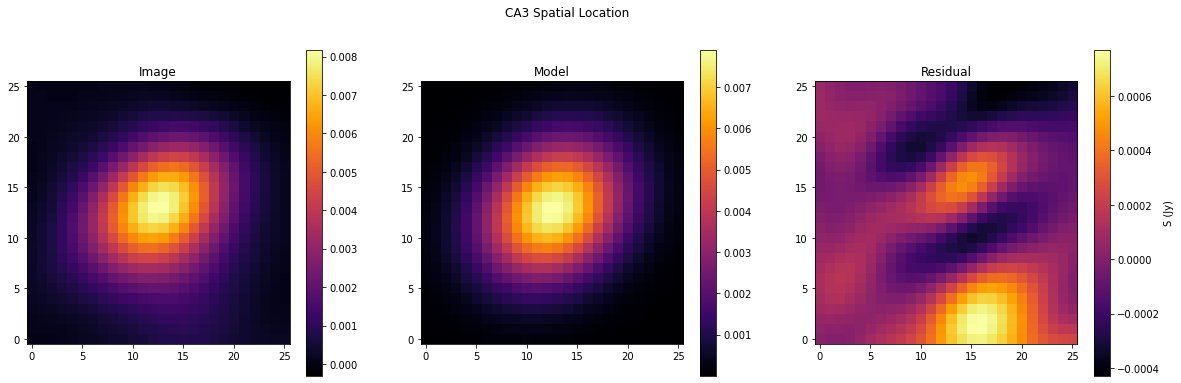

Parameter Error

7.949175317e-03 2.537724792e-04

2.90917076e+02 1.224428804e-07

1.45182376e+01 1.211903920e-07

3.577235901e-06 1.176348935e-07

4.368343544e-06 1.261432863e-07

-4.122734972e+01 3.332209776e-01



In [45]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='fits')
cube = cube[0,:,:]
x, y = 3295, 3580
size = 13

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=0.03 * (u.Jy/u.beam),
                                   x_stddev=1.111111e-5 * u.degree, y_stddev=1.111111e-5 * u.degree, theta=1.5*u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout



with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)


p_init_gauss2D.theta.fixed = True

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
#theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

              
plt.figure(figsize=(20, 6))
plt.suptitle("CA3 Spatial Location")

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

#saveplotfig_gaussianfit()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

# Oct 4

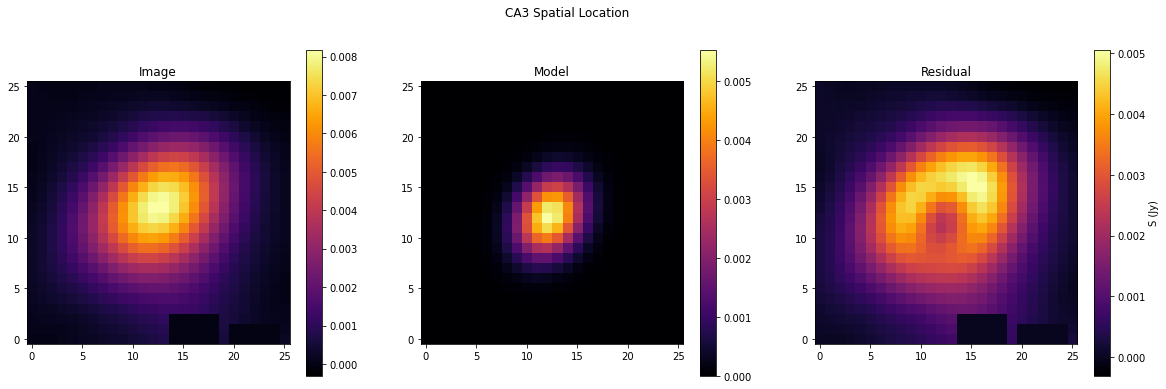

Parameter Error

5.580807660e-03 1.026621031e-03

2.909170762e+02 1.998005543e-06

1.451823708e+01 1.958538988e-06

1.795204919e-06 3.126287961e-06

2.283606885e-06 3.166170107e-06

-4.122734972e+01 7.732789642e+00



In [74]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='fits')
cube = cube[0,:,:]
x, y = 3295, 3580
size = 13

cube_cutout = cube[y - size:y + size, x - size:x + size]
cube_cutout[0:2,20:25] = 0
cube_cutout[0:3,14:19] = 0
#cube_cutout[15:17,15:17] = 0
                          
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=0.03 * (u.Jy/u.beam),
                                   x_stddev=1.111111e-5 * u.degree, y_stddev=1.111111e-5 * u.degree, theta=1.5*u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout



with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)


p_init_gauss2D.theta.fixed = True

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
#theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

              
plt.figure(figsize=(20, 6))
plt.suptitle("CA3 Spatial Location")

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

#saveplotfig_gaussianfit()
  
print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

### What if I subtract the residual from the initial image?

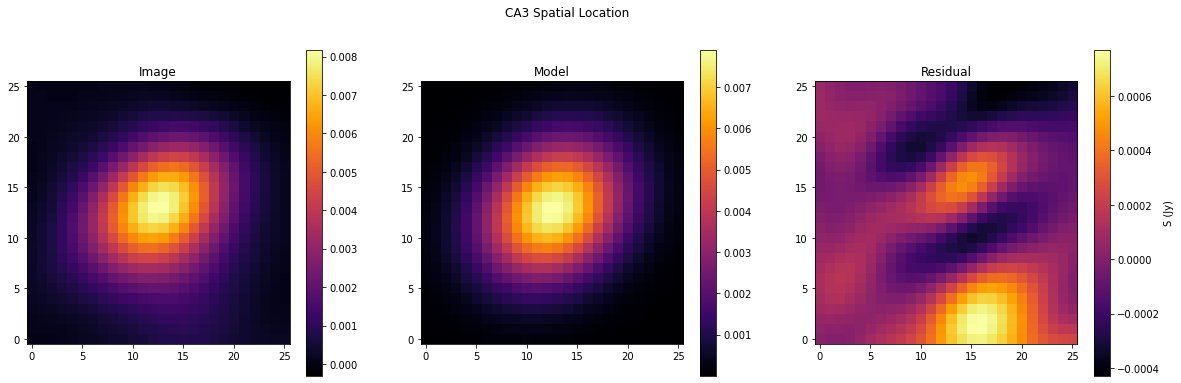

Parameter Error

7.949175317e-03 2.537724792e-04

2.90917076e+02 1.224428804e-07

1.45182376e+01 1.211903920e-07

3.577235901e-06 1.176348935e-07

4.368343544e-06 1.261432863e-07

-4.122734972e+01 3.332209776e-01



In [75]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='fits')
cube = cube[0,:,:]
x, y = 3295, 3580
size = 13

cube_cutout = cube[y - size:y + size, x - size:x + size]

#cube_cutout[15:17,15:17] = 0
                          
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=0.03 * (u.Jy/u.beam),
                                   x_stddev=1.111111e-5 * u.degree, y_stddev=1.111111e-5 * u.degree, theta=1.5*u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout



with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)


p_init_gauss2D.theta.fixed = True

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
#theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

              
plt.figure(figsize=(20, 6))
plt.suptitle("CA3 Spatial Location")

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

#saveplotfig_gaussianfit()
  
print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

In [76]:
residual_cube_cutout = cube_cutout.value - p_gauss2D(xx, yy).value

image_cube_cutout = cube_cutout.value

image_mod = image_cube_cutout - residual_cube_cutout

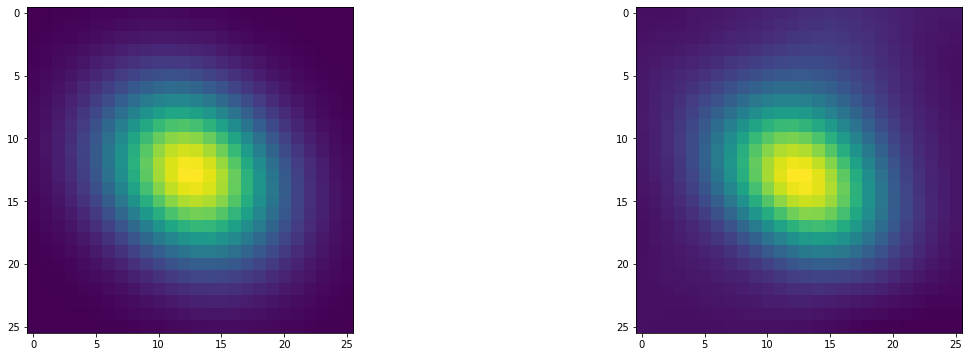

In [85]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.imshow(image_mod)
plt.subplot(1,2,2)
plt.imshow(cube_cutout.value)

## It is just the model image...